<a href="https://colab.research.google.com/github/Rajlaxmi2002/Kaggle_competitions/blob/main/JPX_TokyoStockExchangePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""pip install kaggle --upgrade"""

'pip install kaggle --upgrade'

In [ ]:
! mkdir ~/.kaggle

# Data exploration


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download -c jpx-tokyo-stock-exchange-prediction

 99% 238M/241M [00:01<00:00, 133MB/s]
100% 241M/241M [00:01<00:00, 129MB/s]


In [ ]:
! unzip jpx-tokyo-stock-exchange-prediction


Archive:  jpx-tokyo-stock-exchange-prediction.zip
  inflating: data_specifications/options_spec.csv  
  inflating: data_specifications/stock_fin_spec.csv  
  inflating: data_specifications/stock_list_spec.csv  
  inflating: data_specifications/stock_price_spec.csv  
  inflating: data_specifications/trades_spec.csv  
  inflating: example_test_files/financials.csv  
  inflating: example_test_files/options.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/secondary_stock_prices.csv  
  inflating: example_test_files/stock_prices.csv  
  inflating: example_test_files/trades.csv  
  inflating: jpx_tokyo_market_prediction/__init__.py  
  inflating: jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: stock_list.csv          
  inflating: supplemental_files/financials.csv  
  inflating: supplemental_files/options.csv  
  inflating: supplemental_files/secondary_stock_prices.csv  
  inflating: supplemental_files/stock_

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('ggplot')

In [ ]:
df=pd.read_csv('/content/train_files/stock_prices.csv')

In [ ]:
df

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [ ]:
columns=df.columns
columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')

In [ ]:
df.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2.332531e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.332531e+06,2.332531e+06,18865.000000,2.332293e+06
mean,5.894835e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.919366e+05,1.000508e+00,22.017730,4.450962e-04
std,2.404161e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.911256e+06,6.773040e-02,29.882453,2.339879e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,0.000000e+00,1.000000e-01,0.000000,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.030000e+04,1.000000e+00,5.000000,-1.049869e-02
50%,6.238000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.071000e+05,1.000000e+00,15.000000,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.021000e+05,1.000000e+00,30.000000,1.053159e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,2.000000e+01,1070.000000,1.119512e+00


In [ ]:
data=df.copy()[0:1000]

In [ ]:
data_spec=pd.read_csv('/content/data_specifications/stock_price_spec.csv')

In [ ]:
names=pd.read_csv("/content/stock_list.csv")
names

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [ ]:
df.drop("RowId",axis=1)

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...
2332526,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [ ]:
temp= pd.DataFrame()
temp[["year","date_month"]]=(df["Date"].str.split("-",1,True))

df["year"]=temp['year']


In [ ]:
df17=df[df["year"]=="2017"]


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,year
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2017
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,2017
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,2017
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,2017
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463717,20171229_9990,2017-12-29,9990,1383.0,1396.0,1371.0,1394.0,43600,1.0,NaN,False,-0.019481,2017
463718,20171229_9991,2017-12-29,9991,1397.0,1398.0,1389.0,1395.0,15000,1.0,NaN,False,0.000708,2017
463719,20171229_9993,2017-12-29,9993,1755.0,1758.0,1753.0,1753.0,1400,1.0,NaN,False,-0.001139,2017
463720,20171229_9994,2017-12-29,9994,3360.0,3470.0,3355.0,3430.0,29500,1.0,NaN,False,-0.004219,2017


In [ ]:
df171301=df17[df17["SecuritiesCode"]==1301]


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,year
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2017
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,2017
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,2017
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,2017
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454242,20171225_1301,2017-12-25,1301,4220.0,4295.0,4215.0,4275.0,53400,1.0,NaN,False,-0.017261,2017
456138,20171226_1301,2017-12-26,1301,4300.0,4415.0,4300.0,4345.0,75200,1.0,NaN,False,0.009368,2017
458034,20171227_1301,2017-12-27,1301,4385.0,4400.0,4250.0,4270.0,58200,1.0,NaN,False,-0.003480,2017
459930,20171228_1301,2017-12-28,1301,4270.0,4325.0,4230.0,4310.0,58100,1.0,NaN,False,0.005821,2017


In [ ]:
df1=df171301.copy()
df1['Volume']=(df1['Volume']-min(df1['Volume']))/(max(df1['Volume'])-min(df1['Volume']))

In [ ]:
df2=df1[['Date','Volume','Close']]

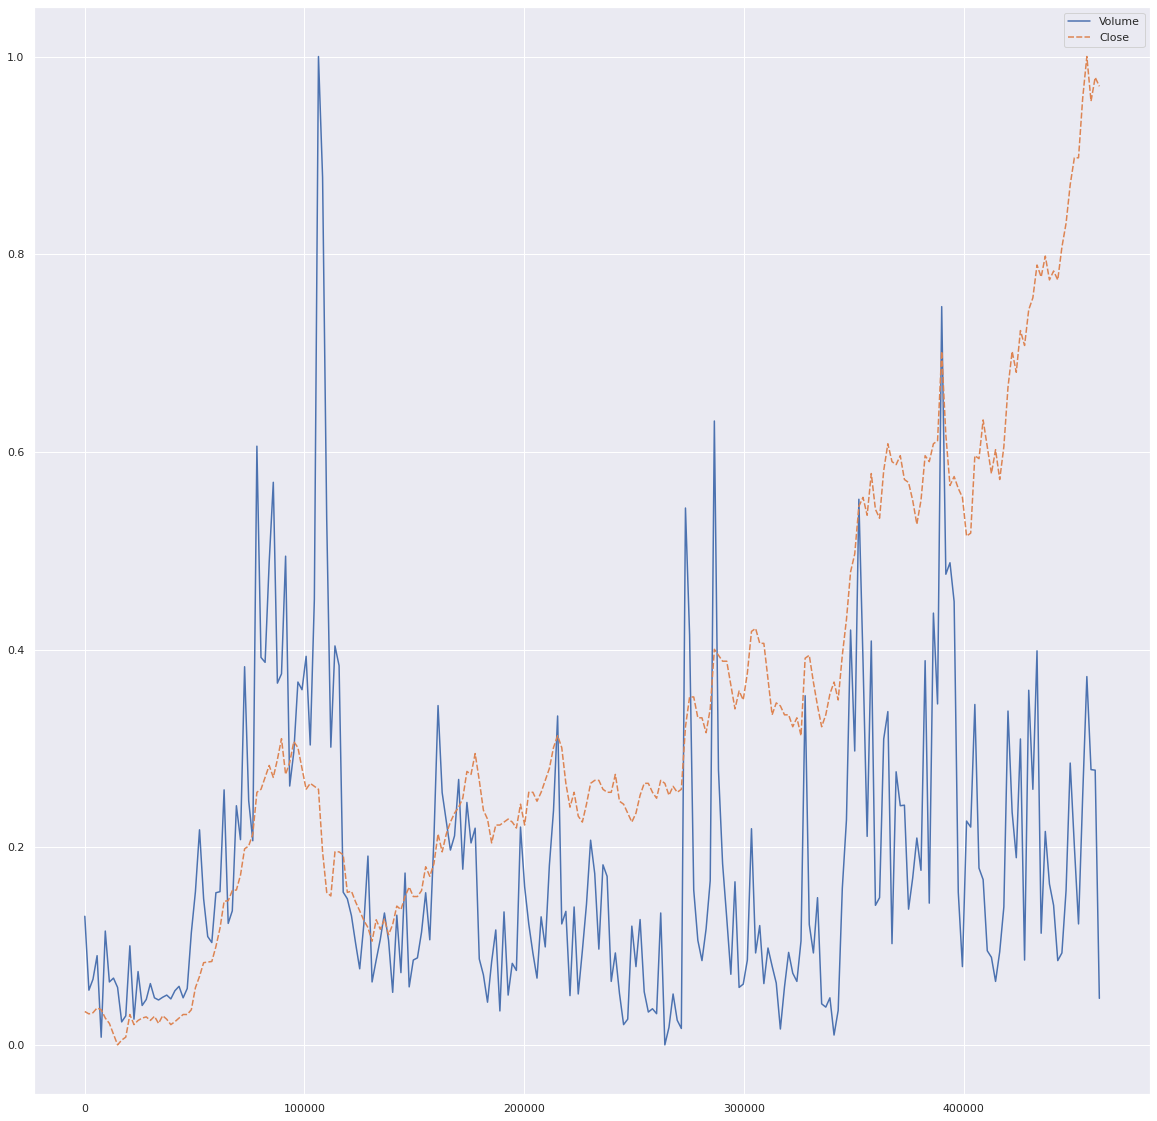

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime



fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Close'])])
sns.set(rc={'figure.figsize':(20,20)})
df1['Close']=(df1['Close']-min(df1['Close']))/(max(df1['Close'])-min(df1['Close']))
df2=df1[['Date','Volume','Close']]
sns.lineplot(data=df2)

fig.show()

In [ ]:
financials=pd.read_csv("/content/supplemental_files/financials.csv")
options=pd.read_csv("/content/supplemental_files/options.csv")
secondarysp=pd.read_csv("/content/supplemental_files/secondary_stock_prices.csv",parse_dates=True)
sp=pd.read_csv("/content/supplemental_files/stock_prices.csv",parse_dates=True)
trades=pd.read_csv("/content/supplemental_files/trades.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
financials

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.021121e+13,20211206_1873,2021-12-06,1873.0,2021-12-06,15:00:00,1.638770e+09,ForecastRevision,2021-10-31,FY,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.021121e+13,20211206_4813,2021-12-06,4813.0,2021-12-06,15:00:00,1.638770e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,-77.98,NaN,True,False,False,False,False,39633000.0,466421,39095375.0
2,2.021112e+13,20211206_4824,2021-12-06,4824.0,2021-12-06,08:30:00,1.638747e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,3.69,NaN,False,False,False,False,False,9766800.0,23345,9743455.0
3,2.021112e+13,20211206_6656,2021-12-06,6656.0,2021-12-06,15:00:00,1.638770e+09,2QFinancialStatements_NonConsolidated_JP,2021-10-31,2Q,...,44.85,False,NaN,True,False,False,False,3790400.0,156,3790170.0
4,2.021120e+13,20211206_9824,2021-12-06,9824.0,2021-12-06,11:00:00,1.638756e+09,ForecastRevision,2021-10-31,FY,...,337.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,2.022062e+13,20220624_7438,2022-06-24,7438.0,2022-06-24,15:00:00,1.656050e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9790,2.022062e+13,20220624_7678,2022-06-24,7678.0,2022-06-24,16:10:00,1.656055e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,True,True,False,True,False,5377070.0,50549,5325854.0
9791,2.022062e+13,20220624_8705,2022-06-24,8705.0,2022-06-24,15:00:00,1.656050e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,True,True,True,True,False,58251592.0,7868,58141036.0
9792,2.022062e+13,20220624_9522,2022-06-24,9522.0,2022-06-24,15:15:00,1.656051e+09,ForecastRevision,2022-12-31,FY,...,-57.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
options

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20211206_130060018,2021-12-06,130060018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20250612,20250613,1660.0,1548.5673,22.35085,23.8770,0.1564,0.0,0.0
1,20211206_130060218,2021-12-06,130060218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20250612,20250613,1730.0,1613.2578,22.35085,23.7511,0.1564,0.0,0.0
2,20211206_130060518,2021-12-06,130060518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20250612,20250613,1800.0,1680.2521,22.35085,23.6127,0.1564,0.0,0.0
3,20211206_130060718,2021-12-06,130060718,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20250612,20250613,1875.0,1749.4928,22.35085,23.4965,0.1564,0.0,0.0
4,20211206_130061018,2021-12-06,130061018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20250612,20250613,1950.0,1820.9126,22.35085,23.3677,0.1564,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584497,20220624_199244018,2022-06-24,199244018,0.0,0.0,0.0,0.0,0,0,0,...,2,20241212,20241213,135.0,137.2654,20.89105,19.4258,0.1691,0.0,0.0
584498,20220624_199245018,2022-06-24,199245018,0.0,0.0,0.0,0.0,0,0,0,...,2,20241212,20241213,645.0,652.6527,20.89105,19.4094,0.1691,0.0,0.0
584499,20220624_199246018,2022-06-24,199246018,0.0,0.0,0.0,0.0,0,0,0,...,2,20241212,20241213,545.0,551.1395,20.89105,19.4185,0.1691,0.0,0.0
584500,20220624_199247018,2022-06-24,199247018,0.0,0.0,0.0,0.0,0,0,0,...,2,20241212,20241213,460.0,464.7809,20.89105,19.4279,0.1691,0.0,0.0


In [ ]:
secondarysp

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1305,2021-12-06,1305,2061.5,2065.0,2041.5,2048.0,104900,1.0,NaN,False,0.005013
1,20211206_1306,2021-12-06,1306,2037.0,2041.0,2018.5,2025.0,1427480,1.0,NaN,False,0.005793
2,20211206_1308,2021-12-06,1308,2016.0,2019.5,1997.5,2004.5,110000,1.0,NaN,False,0.005367
3,20211206_1309,2021-12-06,1309,43400.0,43710.0,43030.0,43190.0,323,1.0,NaN,False,0.005927
4,20211206_1311,2021-12-06,1311,952.1,953.4,943.5,947.5,2030,1.0,NaN,False,0.006300
...,...,...,...,...,...,...,...,...,...,...,...,...
284578,20220624_9980,2022-06-24,9980,111.0,111.0,109.0,110.0,88000,1.0,NaN,False,-0.009009
284579,20220624_9986,2022-06-24,9986,1862.0,1913.0,1862.0,1913.0,3500,1.0,NaN,False,-0.007495
284580,20220624_9995,2022-06-24,9995,402.0,404.0,400.0,402.0,16000,1.0,NaN,False,0.004950
284581,20220624_9996,2022-06-24,9996,1281.0,1281.0,1231.0,1241.0,1700,1.0,NaN,False,0.000806


In [ ]:
sp

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
269876,20220624_9990,2022-06-24,9990,576.0,576.0,563.0,564.0,24200,1.0,NaN,False,0.027073
269877,20220624_9991,2022-06-24,9991,810.0,815.0,804.0,815.0,8700,1.0,NaN,False,0.001220
269878,20220624_9993,2022-06-24,9993,1548.0,1548.0,1497.0,1497.0,12600,1.0,NaN,False,0.001329
269879,20220624_9994,2022-06-24,9994,2507.0,2527.0,2498.0,2527.0,7300,1.0,NaN,False,0.003185


In [ ]:
trades

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2021-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-09,2021-11-29,2021-12-03,Growth Market (Mothers/JASDAQ),1.354891e+09,1.355661e+09,2.710552e+09,770298.0,6.218278e+07,5.784586e+07,...,550727.0,-469681.0,8724761.0,1.007488e+07,1.879964e+07,1350115.0,122887.0,217460.0,340347.0,94573.0
4,2021-12-09,2021-11-29,2021-12-03,Prime Market (First Section),2.149748e+10,2.153523e+10,4.303271e+10,37753986.0,3.689338e+09,2.941681e+09,...,53054846.0,-7866614.0,756773936.0,1.099845e+09,1.856619e+09,343071300.0,27316235.0,38481654.0,65797889.0,11165419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2022-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2022-06-23,2022-06-13,2022-06-17,Growth Market (Mothers/JASDAQ),5.145487e+08,5.136706e+08,1.028219e+09,-878094.0,2.274620e+07,1.502080e+07,...,3259.0,3259.0,2901392.0,2.637541e+06,5.538933e+06,-263851.0,60073.0,200077.0,260150.0,140004.0
190,2022-06-23,2022-06-13,2022-06-17,Prime Market (First Section),1.762533e+10,1.762463e+10,3.524996e+10,-695939.0,2.263838e+09,2.040484e+09,...,60657996.0,-28157888.0,395157828.0,4.583024e+08,8.534602e+08,63144525.0,18596386.0,21746926.0,40343312.0,3150540.0
191,2022-06-23,2022-06-13,2022-06-17,Standard Market (Second Section),4.720602e+08,4.717914e+08,9.438515e+08,-268815.0,2.616806e+07,2.136670e+07,...,233091.0,-229757.0,3260247.0,4.732376e+06,7.992623e+06,1472129.0,34497.0,163740.0,198237.0,129243.0


In [ ]:
stocklist=pd.read_csv("/content/stock_list.csv")
stocklist

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [ ]:
#add section,sector,new market segment,sector code, IssuedShares,	MarketCapitalization	from stock list

In [ ]:
financials_train=pd.read_csv("/content/train_files/financials.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
financials_train

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,2.021112e+13,20211203_6040,2021-12-03,6040.0,2021-12-03,15:00:00,1.638511e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,－,NaN,False,True,False,False,False,16000400.0,836400,15164000.0
92952,2.021120e+13,20211203_6898,2021-12-03,6898.0,2021-12-03,16:00:00,1.638515e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,142.01,NaN,False,False,False,False,False,816979.0,157541,659486.0
92953,2.021120e+13,20211203_6969,2021-12-03,6969.0,2021-12-03,15:00:00,1.638511e+09,ForecastRevision,2022-03-31,FY,...,-147.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92954,2.021112e+13,20211203_8057,2021-12-03,8057.0,2021-12-03,17:00:00,1.638518e+09,1QFinancialStatements_Consolidated_JP,2021-10-20,1Q,...,330.92,NaN,False,True,False,False,False,10419371.0,614032,9805339.0


# Artificial neural network

https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt


In [ ]:
model=models.Sequential(name="Perceptron" , layers=[
          layers.Dense(
              name="dense",
              input_dim=5, #input dimension=5 model is trained using 5 parameter
              units=1 , #output_dimension=1(for regression/binary classification)
              activation='linear'
          )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


building a model

In [ ]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


visualising model

for classification

In [ ]:
def Recall(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall
def Precision(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision
def F1(y_true,y_pred):
   precision = Precision(y_true, y_pred)
   recall = Recall(y_true, y_pred)
   return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#model.compile(optimizer='adam', loss='binary_crossentropy', 
#             metrics=['accuracy',F1])

In [ ]:
financials_t=pd.read_csv("/content/train_files/financials.csv")
options_t=pd.read_csv("/content/train_files/options.csv",dtype='unicode')
secondarysp_t=pd.read_csv("/content/train_files/secondary_stock_prices.csv")
sp_t=pd.read_csv("/content/train_files/stock_prices.csv",dtype='unicode')
trades_t=pd.read_csv("/content/train_files/trades.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
financials.append(financials_t,ignore_index=True)
financials

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.021121e+13,20211206_1873,2021-12-06,1873.0,2021-12-06,15:00:00,1.638770e+09,ForecastRevision,2021-10-31,FY,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.021121e+13,20211206_4813,2021-12-06,4813.0,2021-12-06,15:00:00,1.638770e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,-77.98,NaN,True,False,False,False,False,39633000.0,466421,39095375.0
2,2.021112e+13,20211206_4824,2021-12-06,4824.0,2021-12-06,08:30:00,1.638747e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,3.69,NaN,False,False,False,False,False,9766800.0,23345,9743455.0
3,2.021112e+13,20211206_6656,2021-12-06,6656.0,2021-12-06,15:00:00,1.638770e+09,2QFinancialStatements_NonConsolidated_JP,2021-10-31,2Q,...,44.85,False,NaN,True,False,False,False,3790400.0,156,3790170.0
4,2.021120e+13,20211206_9824,2021-12-06,9824.0,2021-12-06,11:00:00,1.638756e+09,ForecastRevision,2021-10-31,FY,...,337.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,2.022062e+13,20220624_7438,2022-06-24,7438.0,2022-06-24,15:00:00,1.656050e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9790,2.022062e+13,20220624_7678,2022-06-24,7678.0,2022-06-24,16:10:00,1.656055e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,True,True,False,True,False,5377070.0,50549,5325854.0
9791,2.022062e+13,20220624_8705,2022-06-24,8705.0,2022-06-24,15:00:00,1.656050e+09,NumericalCorrection,2022-03-31,FY,...,NaN,NaN,True,True,True,True,False,58251592.0,7868,58141036.0
9792,2.022062e+13,20220624_9522,2022-06-24,9522.0,2022-06-24,15:15:00,1.656051e+09,ForecastRevision,2022-12-31,FY,...,-57.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
options=options.append(options_t)
secondarysp=secondarysp.append(secondarysp_t)
trades=trades.append(trades_t)
sp=sp.append(sp_t,ignore_index=True)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
2602407,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.0348162475822051
2602408,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.0254777070063694
2602409,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.0043023970497848
2602410,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.0090984284532671


In [ ]:
sp=sp.append(secondarysp,ignore_index=True)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
5271565,20211203_9980,2021-12-03,9980,129.0,131.0,129.0,130.0,44400,1.0,NaN,False,0.007692
5271566,20211203_9986,2021-12-03,9986,1900.0,1900.0,1891.0,1896.0,3800,1.0,NaN,False,0.004213
5271567,20211203_9995,2021-12-03,9995,390.0,395.0,388.0,394.0,43400,1.0,NaN,False,0.030534
5271568,20211203_9996,2021-12-03,9996,1490.0,1500.0,1490.0,1500.0,500,1.0,NaN,False,0.02215


In [ ]:
df=sp.copy()

In [ ]:
df.drop(df.columns[[0]], axis = 1, inplace = True)



,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...
5271565,2021-12-03,9980,129.0,131.0,129.0,130.0,44400,1.0,NaN,False,0.007692
5271566,2021-12-03,9986,1900.0,1900.0,1891.0,1896.0,3800,1.0,NaN,False,0.004213
5271567,2021-12-03,9995,390.0,395.0,388.0,394.0,43400,1.0,NaN,False,0.030534
5271568,2021-12-03,9996,1490.0,1500.0,1490.0,1500.0,500,1.0,NaN,False,0.02215


In [ ]:
len(df['SecuritiesCode'].unique())

6416

## add section,sector,new market segment,sector code, IssuedShares,	MarketCapitalization	from stock list

In [ ]:
st_spec=pd.read_csv('/content/data_specifications/stock_list_spec.csv')
for i in st_spec['Remarks']:
  print(i)

Local Securities Code
the effective date
Name of security
Section/Product
New market segment effective from 2022-04-04 (as of 15:30 JST on Mar 11 2022)
ref. https://www.jpx.co.jp/english/equities/market-restructure/market-segments/index.html
33 Sector Name

ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
33 Sector Name

ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
17 Sector Code
ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
17 Sector Name
ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
TOPIX New Index Series code

ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_12_size.pdf
TOPIX New Index Series Name

ref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_12_size.pdf
Trade date to calculate MarketCapitalization
Close price to calculate MarketCapitalization
Issued shares
Market capitalization on De

In [ ]:
def ma(df):
  X=pd.DataFrame()
  for c in df['SecuritiesCode'].unique():
    temp=df.copy()
    temp=temp.sort_values(by=['Date'], ascending=True)
    s17=[stocklist[stocklist['SecuritiesCode']==c]['17SectorCode'].iloc[0]]*len(temp['SecuritiesCode'])
    ic=[stocklist[stocklist['SecuritiesCode']==c]['NewIndexSeriesSizeCode'].iloc[0]]*len(temp['SecuritiesCode'])
    mc=[stocklist[stocklist['SecuritiesCode']==c]['MarketCapitalization'].iloc[0]]*len(temp['SecuritiesCode'])
    
    temp['sectorcode17']=s17
    temp['indexcode']=ic
    temp['marketcap']=mc

    l=[0]
    #print(len(temp['Volume']))
    for i in range(1,len(temp['Volume'])):
    #print(temp.iloc[i].Volume)
      if temp.iloc[i-1].Volume == temp.iloc[i].Volume:
          l.append(0)
      elif temp.iloc[i-1].Volume>temp.iloc[i].Volume:
          l.append(-1);
      else:
          l.append(1)
    #moving averages
    temp['MA_20'] = temp.Close.rolling(10, min_periods=1).mean()
    temp['MA_50'] = temp.Close.rolling(20, min_periods=1).mean()
    temp['MA_10'] = temp.Close.rolling(5, min_periods=1).mean()
    temp["Volume_change"]=l
    if (temp.High!=temp.Low).all():
      temp["Stochastic_osc"]=(temp.Close-temp.Low)/(temp.High-temp.Low) 
    else:
      temp["Stochastic_osc"]=(temp.Close-temp.Low)
    X=X.append(temp)
  return X


In [ ]:
df.drop('ExpectedDividend', axis = 1, inplace = True)


In [ ]:
df.columns

Index(['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close', 'Volume',
       'AdjustmentFactor', 'SupervisionFlag', 'Target'],
      dtype='object')

In [ ]:
def normalisation(df):
  col=['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor', 'MA_20', 'MA_50', 'MA_10', 'Volume_change', 'Stochastic_osc','sectorcode17','marketcap','indexcode','Target']
  normalized_df=df
  for x in col:
    df[x] = df[x].astype(float)
    normalized_df[x]=(df[x]-df[x].min())/(df[x].max()-df[x].min())
    normalized_df['Target']=df['Target']
  return normalized_df

In [ ]:
X=df[df['SecuritiesCode']==1301]

In [ ]:

X=ma(X)
X=normalisation(X)

In [ ]:
def model(S):
  col=['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor', 'MA_20', 'MA_50', 'MA_10', 'Volume_change', 'Stochastic_osc','sectorcode17','marketcap','indexcode']
  for x in S:
    temp=df[df['SecuritiesCode']==x]
    temp=temp.dropna()
    X=temp[col]
    y=temp['Target']


In [ ]:
from sklearn.decomposition import PCA
X=X.reset_index(drop=True)
col=['Open', 'High', 'Low','Close', 'Volume','MA_20', 'MA_50', 'MA_10', 'Volume_change', 'Stochastic_osc']



y=X.pop('Target')
X=X[col]
pca = PCA(random_state=42).fit(X)

X_pca = pd.DataFrame(pca.transform(X), index=X.index)

pca_comp = pd.DataFrame(pca.components_, index=X.columns)
pca_comp.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

,0,1,2,3,4,5,6,7,8,9
Open,-0.349636,-0.347327,-0.362315,-0.353519,-0.110454,-0.407207,-0.420732,-0.379124,0.045568,0.005054
High,0.000851,-0.022513,-0.001570,-0.033819,-0.066572,-0.013327,-0.021094,-0.010218,-0.980157,-0.180220
Low,0.031695,-0.009110,-0.002262,-0.088277,0.028511,0.023202,0.014356,0.023067,0.180311,-0.978015
Close,0.228606,0.209514,0.183932,0.190209,0.627881,-0.268904,-0.604625,0.016581,-0.034841,-0.015120
Volume,-0.213396,-0.143845,-0.317049,-0.244079,0.756632,0.159386,0.413498,0.002258,-0.057519,0.038545
MA_20,-0.262512,-0.064170,-0.209757,-0.079105,-0.048257,0.585991,-0.507118,0.522994,0.001874,0.017448
MA_50,-0.748892,0.390808,-0.037989,0.486116,0.001608,-0.188068,0.082193,0.023506,-0.011832,-0.076535
MA_10,0.298803,0.616632,-0.675098,-0.025558,-0.092012,0.115389,-0.039588,-0.225175,-0.004278,0.001183
Volume_change,-0.092372,-0.098296,0.200000,0.231651,0.070785,0.582340,-0.139729,-0.723693,-0.003291,-0.027297
Stochastic_osc,0.226679,-0.517146,-0.439512,0.688078,0.004533,-0.067551,0.027663,0.082686,-0.002878,-0.048572


In [ ]:
X_pca

,0,1,2,3,4,5,6,7,8,9
0,1.308255,0.114132,0.147770,0.077722,0.026005,0.003914,-0.013062,-0.017461,0.012124,0.005195
1,1.068761,-0.511300,-0.401849,0.081147,0.063846,0.020451,0.037619,0.019767,0.007121,0.004755
2,0.912221,0.571628,-0.033243,0.112901,0.016824,-0.030867,-0.018165,0.027427,0.012461,0.005616
3,0.927908,-0.512063,-0.400874,0.039232,0.002521,0.007164,-0.005893,0.020724,0.000008,0.005489
4,0.822188,-0.516772,-0.399449,0.071298,-0.010124,-0.019077,-0.043857,0.029646,0.001891,0.012812
...,...,...,...,...,...,...,...,...,...,...
130,-0.632294,-0.400364,0.537965,-0.128591,-0.090324,-0.045259,-0.037439,0.077388,-0.001029,-0.019561
131,-0.597194,-0.521198,-0.115798,-0.165029,-0.039176,0.001281,0.028356,0.014974,0.004406,-0.005334
132,-0.757186,-0.581362,-0.402757,-0.088942,-0.090014,-0.024383,0.046079,0.008004,-0.007268,0.002204
133,-0.963637,0.516763,0.071682,0.017211,-0.154398,-0.103143,0.017167,-0.002883,0.006262,0.003856


In [ ]:
X

array([[ 1.3082552 ,  0.11413185,  0.14777029, ..., -0.01746135,
         0.01212419,  0.00519546],
       [ 1.0687605 , -0.5113001 , -0.40184888, ...,  0.01976739,
         0.00712073,  0.00475508],
       [ 0.9122209 ,  0.57162786, -0.03324276, ...,  0.02742729,
         0.01246078,  0.005616  ],
       ...,
       [-0.7571859 , -0.5813624 , -0.4027571 , ...,  0.00800379,
        -0.00726807,  0.0022039 ],
       [-0.96363705,  0.5167628 ,  0.07168223, ..., -0.0028828 ,
         0.00626197,  0.00385568],
       [-0.9066249 ,  0.56104517,  0.29154858, ...,  0.07552305,
        -0.03633041, -0.00396939]], dtype=float32)

## **LSTM**

In [ ]:
look_back = 10
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
look_back = 10
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
def lstm_model(trainX,trainY,model):
  #model = Sequential()
  trainX=np.asarray(trainX).astype('float32')
  trainY=np.asarray(trainY).astype('float32')
  model.add(LSTM(units=10, return_sequences=True, input_shape = (trainX.shape[1], 1)))
  model.add(Dropout(0.1)) 
  
  model.add(LSTM(units=5))
  model.add(Dense(2))
  
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(trainX, trainY, epochs=100, batch_size=25, verbose=2,
    validation_split=0.3)
  return model

In [ ]:
(model.predict(X[y.size-1:]))[0][1]

0.5127904

In [ ]:
X = np.asarray(X_pca).astype('float32')
y = np.asarray(y).astype('float32')
model=lstm_model(X[0:113],y[0:113],Sequential())
ans=model.predict(X[134:])

Epoch 1/100
4/4 - 7s - loss: 0.2825 - val_loss: 0.2522 - 7s/epoch - 2s/step
Epoch 2/100
4/4 - 0s - loss: 0.2658 - val_loss: 0.2376 - 85ms/epoch - 21ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2497 - val_loss: 0.2226 - 79ms/epoch - 20ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2324 - val_loss: 0.2069 - 91ms/epoch - 23ms/step
Epoch 5/100
4/4 - 0s - loss: 0.2141 - val_loss: 0.1907 - 86ms/epoch - 21ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1951 - val_loss: 0.1735 - 96ms/epoch - 24ms/step
Epoch 7/100
4/4 - 0s - loss: 0.1757 - val_loss: 0.1555 - 89ms/epoch - 22ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1541 - val_loss: 0.1368 - 76ms/epoch - 19ms/step
Epoch 9/100
4/4 - 0s - loss: 0.1334 - val_loss: 0.1176 - 86ms/epoch - 21ms/step
Epoch 10/100
4/4 - 0s - loss: 0.1139 - val_loss: 0.0991 - 94ms/epoch - 24ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0953 - val_loss: 0.0827 - 77ms/epoch - 19ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0802 - val_loss: 0.0693 - 84ms/epoch - 21ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0691 - va

In [ ]:
def rev_min_max_func(y):
    og_val=pd.DataFrame()
    y=pd.DataFrame(y)
    for i in range(2):

      max_val = max(y[i])
      min_val = min(y[i])
      
      og_val[i] = (y[i]-min(y[i]))/(max(y[i])-min(y[i]))
    
    return og_val
ans=rev_min_max_func(ans)

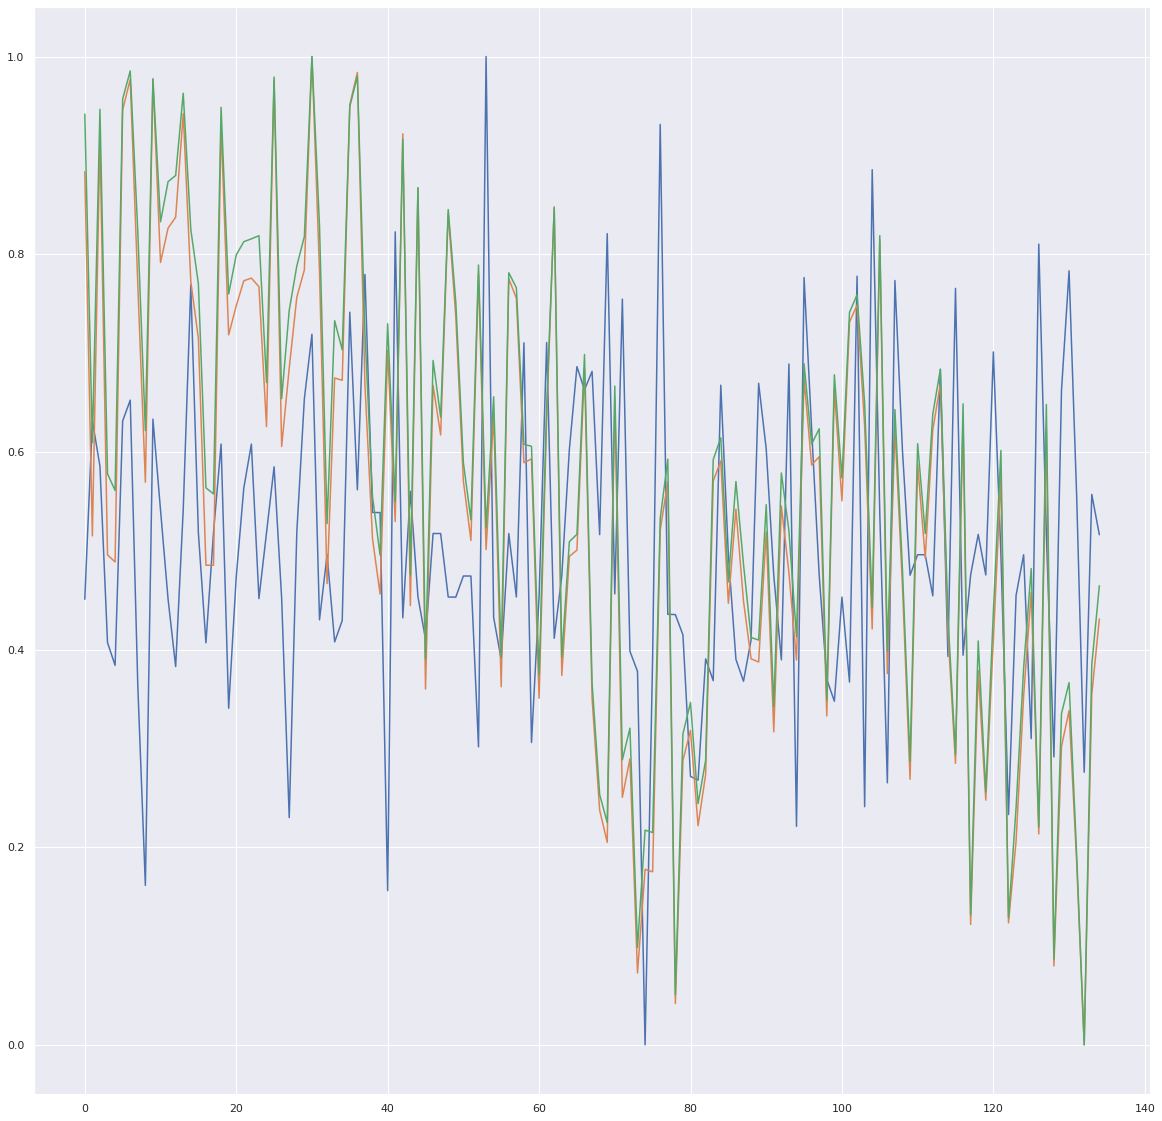

In [ ]:
plt.plot(y)
plt.plot(ans)